<a href="https://colab.research.google.com/github/Akkalaspandana/LSTM-Based-Stock-Price-Forecasting-for-Coca-Cola/blob/main/LSTM-Based%20Stock%20Price%20Forecasting%20for%20Coca-Col.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [2]:
# Load the data from local path
file_path = r'/content/KO_1919-09-06_2025-04-17.csv'
data = pd.read_csv(file_path)

/tmp/ipython-input-3-2019239861.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['date'] = pd.to_datetime(data['date'])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 0.0058 - val_loss: 7.8019e-04
Epoch 2/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 4.0203e-04 - val_loss: 0.0018
Epoch 3/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - loss: 3.4678e-04 - val_loss: 0.0014
Epoch 4/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - loss: 2.9415e-04 - val_loss: 2.6465e-04
Epoch 5/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 2.6344e-04 - val_loss: 6.8239e-04
Epoch 6/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - loss: 2.6196e-04 - val_loss: 2.2958e-04
Epoch 7/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - loss: 2.6875e-04 - val_loss: 3.4276e-04
Epoch 8/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - loss: 2.5718e-04 - val_loss: 3.4145e-04
Epoch 9/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - loss: 2.2444e-04 - val_loss: 0.0015
Epoch 10/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - loss: 2.4318e-04 - val_loss: 0.0013
Epoch 11/50
397/397 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - lo

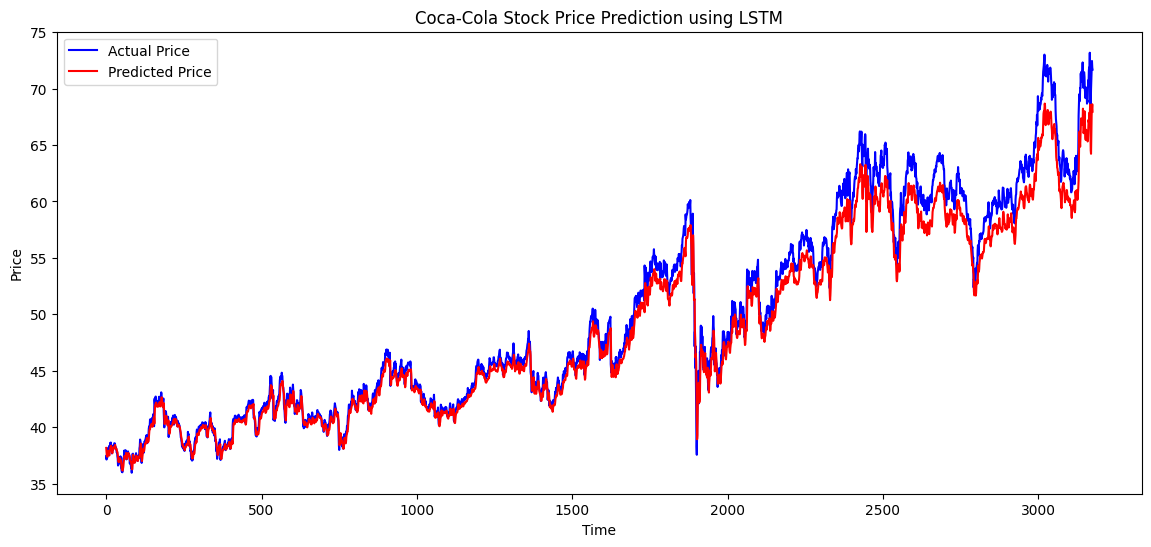

In [3]:

# Convert 'date' to datetime and set as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Use only 'close' price
close_data = data[['close']]

# Normalize the close prices
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_data)

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
      X.append(data[i:i+seq_length])
      y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Sequence length
seq_length = 50
X, y = create_sequences(scaled_data, seq_length)

# Reshape X for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
predicted = model.predict(X_test)

# Inverse transform predictions and actual values
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluation metrics
print("Mean Squared Error:", mean_squared_error(actual_prices, predicted_prices))
print("Mean Absolute Error:", mean_absolute_error(actual_prices, predicted_prices))
print("R2 Score:", r2_score(actual_prices, predicted_prices))
print("MAPE:", mean_absolute_percentage_error(actual_prices, predicted_prices))

# Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(actual_prices, color='blue', label='Actual Price')
plt.plot(predicted_prices, color='red', label='Predicted Price')
plt.title("Coca-Cola Stock Price Prediction using LSTM")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()